# MATH 210 Introduction to Mathematical Computing

## March 13, 2017

* Applications of linear algebra
    * Least Squares Regression
    * Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

## Least squares regression

Given a collection of points $(x_0,y_0), (x_1,y_1), \dots, (x_n,y_n)$, we would like to find coefficients $a$ and $b$ such that the line$y = a + bx$ passes through the points in an optimal way. This means we want to minimize the sum of squared errors:

$$
SSE = \sum_{i = 0}^N (y_i-(a + bx_i))^2
$$

If we form matrices $X$ and $A$ given by

$$
X = 
\begin{bmatrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_N
\end{bmatrix}
A = 
\begin{bmatrix}
a \\
b
\end{bmatrix}
Y = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
$$

then the coefficients $a$ and $b$ which minimize the sum of squared errors $SSE$, is the solution of 

$$
(X^T X)A = (X^T)Y
$$

Let's do an example with some fake data. Let's build a set of random points base on the model $y = a + bx + \epsilon$ and use linear regression to retrieve $a$ and $b$.

In [17]:
a = 2
b = 3
N = 100
x = np.random.rand(N)
noise = 0.1*np.random.rand(N)
y = a + b*x + noise

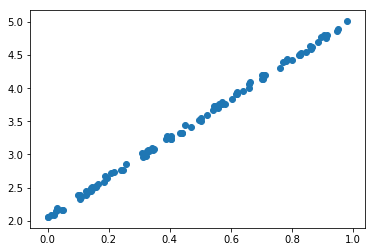

In [18]:
plt.scatter(x,y)

Let's use linear regression to retrieve the coefficients $a$ and $b$.

To build the matrix $X$, we can use the function `numpy.hstack` but first we have to reshape the array $x$ from a 1D NumPy array of shape `(N,)` to a 2D NumPy array of shape `(N,1)`.

In [21]:
X = np.hstack((np.ones(N).reshape(N,1),x.reshape(N,1)))

In [22]:
X.shape

(100, 2)

In [23]:
X[:5,:]

array([[ 1.        ,  0.34695038],
       [ 1.        ,  0.40428631],
       [ 1.        ,  0.20784602],
       [ 1.        ,  0.39195179],
       [ 1.        ,  0.55743447]])

In [24]:
Y = y.reshape(N,1)

In [26]:
Y[:5,:]

array([[ 3.07930909],
       [ 3.27825727],
       [ 2.71927006],
       [ 3.27111076],
       [ 3.69407853]])

Use `scipy.linalg.solve` to solve $(X^T X)A = (X^T)Y$ for A.

In [27]:
A = la.solve(X.T @ X, X.T @ Y)

In [28]:
A

array([[ 2.05201805],
       [ 2.99775116]])

Let's plot the random data points with the linear regression we just computed.

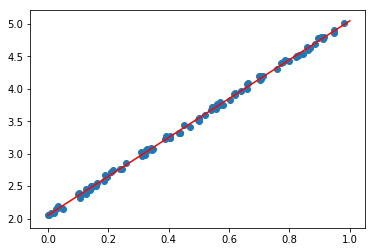

In [29]:
u = np.linspace(0,1,10)
v = A[0,0] + A[1,0]*u
plt.plot(u,v,'r')
plt.scatter(x,y)

### Linear regression for quadratic models

The same idea works for fitting a quadratic model $y = a + bx + cx^2$ to a set of data points $(x_0,y_0), \dots , (x_N,y_N)$. We form the matrices as before but with

$$
X = 
\begin{bmatrix}
1 & x_0 & x_0^2\\
1 & x_1 & x_1^2\\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix}
A = 
\begin{bmatrix}
a \\
b
\end{bmatrix}
Y = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
$$

then the coefficients $a$ and $b$ which minimize the sum of squared errors $SSE$, is the solution of 

$$
(X^T X)A = (X^T)Y
$$

Let's build some fake data using a quadratic model $y = a + bx + cx^2 + \epsilon$ and use linear regression to retrieve the coefficients $a$,$b$ and $c$.

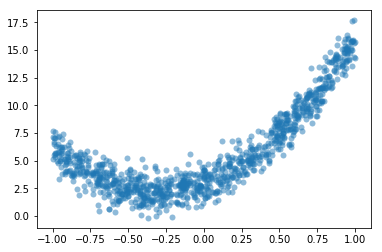

In [32]:
a = 3
b = 5 
c = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in [-1,1]
noise = np.random.randn(N)
y = a + b*x + c*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0)

In [37]:
X = np.hstack((np.ones(N).reshape(N,1),x.reshape(N,1),(x**2).reshape(N,1)))
Y = y.reshape(N,1)

In [38]:
A = la.solve(X.T @ X, X.T @ Y)

In [39]:
A

array([[ 2.95554889],
       [ 4.92625483],
       [ 8.09396428]])

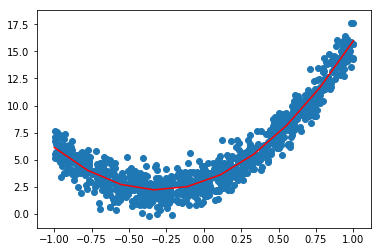

In [40]:
u = np.linspace(-1,1,10)
v = A[0,0] + A[1,0]*u + A[2,0]*u**2
plt.plot(u,v,'r')
plt.scatter(x,y)